In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


### creating the subhalo mass functions

In [4]:
Nideal = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi4/", Nsamp=100, Mres=-4, phimin=-4)

### playing around with a binnless SHMF

In [5]:
test = np.sort(Nideal.acc_surv_mass, axis=1)

In [6]:
test[0]/1e12

array([0.00010042, 0.00010055, 0.00010065, ...,        nan,        nan,
              nan])

In [7]:
hmm = []
masses = []
for i in test:
    mass = i[~np.isnan(i)]
    masses.append(mass)
    hmm.append(len(mass))

In [61]:
yeah = np.array(hmm)

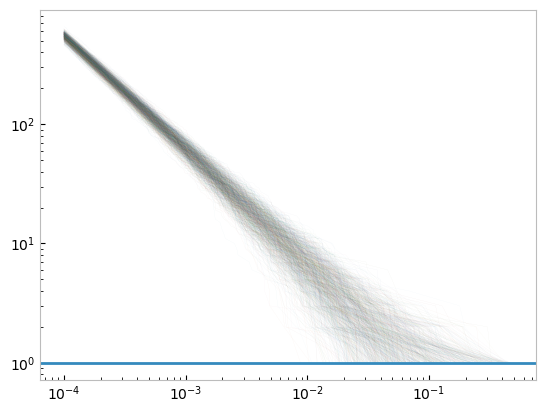

In [67]:
for i in range(1000):
    count_i = yeah[i] - np.arange(yeah[i])
    mass_i = masses[i]/1e12
    plt.plot(mass_i, count_i, lw=0.1, alpha=0.1)
plt.yscale("log")
plt.xscale("log")
plt.axhline(1)
plt.show()

In [29]:
def plot_SHMF_paper(massmat, save_file=None):

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.plot(massmat.phi_bincenters, massmat.acc_SHMF_werr[0], label="Unevolved", color="grey", ls="--")
    #plt.fill_between(massmat.phi_bincenters, y1=massmat.acc_SHMF_werr[0]-massmat.acc_SHMF_werr[1], y2=massmat.acc_SHMF_werr[0]+massmat.acc_SHMF_werr[1], alpha=0.1, color="grey")

    ax.plot(massmat.phi_bincenters, massmat.acc_surv_SHMF_werr[0], label="Unevolved, Surviving", color="black")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+massmat.acc_surv_SHMF_werr[1], alpha=0.3, color="grey")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-2*massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+2*massmat.acc_surv_SHMF_werr[1], alpha=0.2, color="grey")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-3*massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+3*massmat.acc_surv_SHMF_werr[1], alpha=0.1, color="grey")


    ax.plot(massmat.phi_bincenters, massmat.final_SHMF_werr[0],  label="Evolved, Surviving", color="grey", ls="-.")
    #plt.fill_between(massmat.phi_bincenters, y1=massmat.final_SHMF_werr[0]-massmat.final_SHMF_werr[1], y2=massmat.final_SHMF_werr[0]+massmat.final_SHMF_werr[1], alpha=0.1, color="grey")

    # for i in np.random.randint(0,100,100):
    #     ax.plot(Nideal.phi_bincenters, Nideal.acc_surv_phi_counts[i], lw=0.1)

    # ax.axvline(massmat.Mres, ls=":", color="black")
    # ax.text(massmat.Mres+0.05, 0.1, "resolution limit", rotation=90, color="black", fontsize=15)

    ax.text(-1.8, 0.2, "1$\sigma$", color="black", fontsize=15)
    ax.text(-2.3, 0.2, "2$\sigma$", color="black", fontsize=15)
    ax.text(-2.8, 0.2, "3$\sigma$", color="black", fontsize=15)


    ax.set_xlabel("log (m/M$_{\mathrm{host}}$)")
    ax.set_yscale("log")
    ax.set_ylabel("dN / dlog(m/M)")
    ax.set_xlim(-4, -0.1)

    def res_to_mass(x):
        return 12 + x
    
    def mass_to_res(x):
        return x - 12
    secax = ax.secondary_xaxis('top', functions=(res_to_mass, mass_to_res))
    secax.set_xlabel("log m [M$_\odot$]")

    ax.legend()
    if save_file!=None:
        plt.savefig(save_file, bbox_inches="tight")

    plt.show()

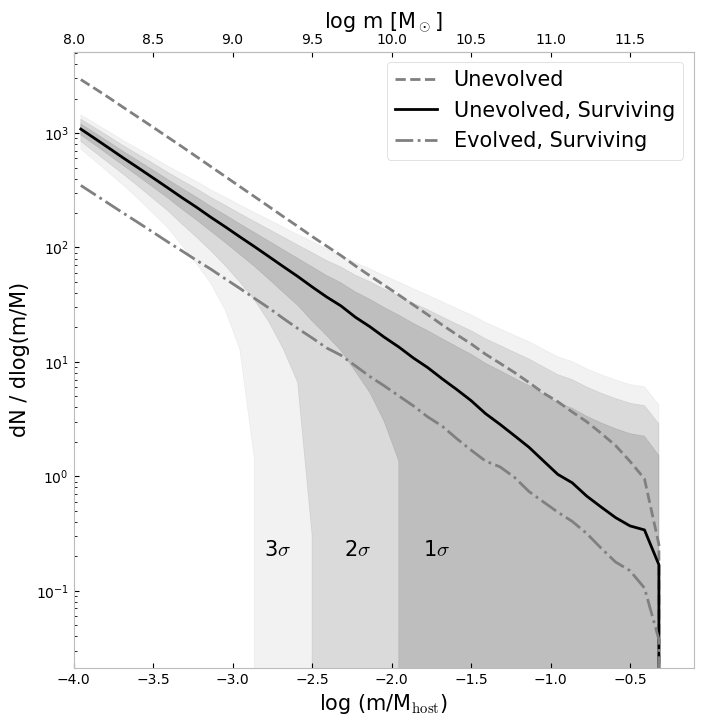

In [30]:
plot_SHMF_paper(Nideal, "../../../paper_1/figures/SHMF.pdf")

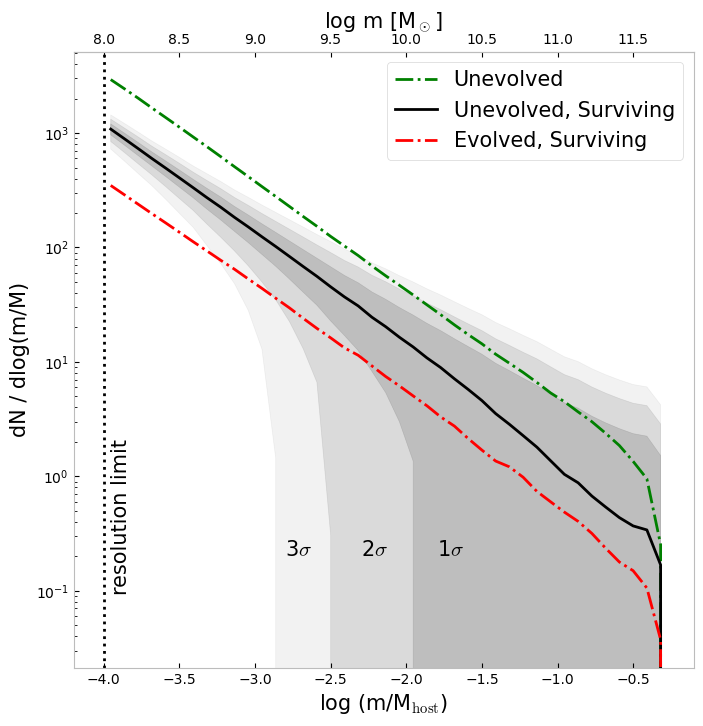

In [7]:
plot_SHMF_paper(Nideal, "../../figures/paper/shmf.png")

### working with RP17 SHMR

In [7]:
# masssepctrum = np.load("../../data/cross_host/pull_try/jsm_MCMC.npy")
# bigstats = galhalo.lgMs_RP17(np.vstack(masssepctrum))
# big = jsm_stats.SatStats(bigstats)
# big.CSMF()


# analogs = np.load("../../data/MW-analog/meta_data_psi4/jsm_MCMC.npy")
# smallstats = galhalo.lgMs_RP17(np.vstack(analogs))
# small = jsm_stats.SatStats(smallstats)
# small.CSMF()

In [8]:
# plt.figure(figsize=(8, 8))

# plt.axvline(6.55, zorder=1, color="green")
# plt.text(6.4, 0.9, "SAGA limit", rotation=90, color="green", fontsize=12)
# plt.axvline(5.55, zorder=1, color="red")
# plt.text(5.4, 0.9, "ELVES limit", rotation=90, color="red", fontsize=12)

# plt.plot(big.mass_bins, big.quant[1], color="navy", lw=2, ls="--", label="MW-analogs")
# plt.fill_between(big.mass_bins, y1=big.quant[0], y2=big.quant[2], alpha=0.2, color="navy")

# plt.plot(small.mass_bins, small.quant[1], color="orange", lw=2, ls="--", label="perfect MW sample")
# plt.fill_between(small.mass_bins, y1=small.quant[0], y2=small.quant[2], alpha=0.2, color="orange")

# plt.legend(fontsize=12)
# plt.yscale("log")
# plt.xlabel("log M$_{*}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("log N (> M$_{*}$)", fontsize=15)
# plt.xlim(4.9, 11)
# plt.ylim(0.5,10**2)
# plt.show()

In [9]:
# big = jsm_stats.SatStats(bigstats[400:500])
# big.CSMF()


# small = jsm_stats.SatStats(smallstats[400:500])
# small.CSMF()

In [10]:
# plt.figure(figsize=(8, 8))

# plt.axvline(6.55, zorder=1, color="green")
# plt.text(6.4, 0.9, "SAGA limit", rotation=90, color="green", fontsize=12)
# plt.axvline(5.55, zorder=1, color="red")
# plt.text(5.4, 0.9, "ELVES limit", rotation=90, color="red", fontsize=12)

# plt.plot(big.mass_bins, big.quant[1], color="navy", lw=2, ls="--", label="MW-analogs")
# plt.fill_between(big.mass_bins, y1=big.quant[0], y2=big.quant[2], alpha=0.2, color="navy")

# plt.plot(small.mass_bins, small.quant[1], color="orange", lw=2, ls="--", label="perfect MW sample")
# plt.fill_between(small.mass_bins, y1=small.quant[0], y2=small.quant[2], alpha=0.2, color="orange")

# plt.legend(fontsize=12)
# plt.yscale("log")
# plt.xlabel("log M$_{*}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("log N (> M$_{*}$)", fontsize=15)
# plt.xlim(4.9, 11)
# plt.ylim(0.5,10**2)
# plt.show()